In [25]:
#Importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Loading Dataset
# Load Iris dataset and find out what is in this dataset
iris = datasets.load_iris()
for key, value in iris.items():
    print(key)

data
target
frame
target_names
DESCR
feature_names
filename


In [4]:
#Let's see the description of this dataset?
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

# Add a column with the target values
df['target'] = iris['target']

# View the summary statistics for each column in the DataFrame
df.describe(include='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
39,5.1,3.4,1.5,0.2,0
99,5.7,2.8,4.1,1.3,1
62,6.0,2.2,4.0,1.0,1
44,5.1,3.8,1.9,0.4,0
58,6.6,2.9,4.6,1.3,1


In [6]:
#What's in target?
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
#How many 0s, 1s, and 2s are in target?
#A:
zero_count=0
one_count=0
two_count=0
for i in iris['target']:
  if i==0:
    zero_count+=1
  elif i==1:
    one_count+=1
  else:
    two_count+=1
print("no of 0's :",zero_count)
print("no of 1's :",one_count)
print("no of 2's :",two_count)

no of 0's : 50
no of 1's : 50
no of 2's : 50


In [8]:
#Using Logistic Regression for binary class classification
# Let's focus on data with only two classes ( the first 100 entries)
data_100 = iris.data[:100,:]
target_100 = iris.target[:100]

In [9]:
#check the size of data_100
len(data_100)

100

In [10]:
#Standardize Features
#What's the mean and standard deviation of data_100 and target_100
#A:
print("Mean of data_100 is",data_100.mean())
print("Standard deviation of data_100 is",data_100.std())

Mean of data_100 is 3.05425
Standard deviation of data_100 is 1.8745617987945877


In [11]:
scaler = StandardScaler()
# Transform the feature
data_100_standardized = scaler.fit_transform(data_100)

In [12]:
#what's the mean and standard deviation of the standardized data_100
#A:
print("Mean of standardized data_100 is",data_100_standardized.mean())
print("Standard deviation standardized of data_100 is",data_100_standardized.std())

Mean of standardized data_100 is -1.1723955140041654e-15
Standard deviation standardized of data_100 is 0.9999999999999998


In [13]:
#Create Logistic Regression
#Let's create a dataframe table to store all the features
features = pd.DataFrame(data_100_standardized, columns=iris.feature_names)
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.581066,0.841837,-1.012978,-1.042111
1,-0.894309,-0.207835,-1.012978,-1.042111
2,-1.207552,0.212034,-1.082312,-1.042111
3,-1.364174,0.002099,-0.943643,-1.042111
4,-0.737687,1.051772,-1.012978,-1.042111


In [14]:
#Create another dataframe to store the target
target = pd.DataFrame(target_100, columns=['target'])

In [15]:
# let's combine these two 'tables' into one dataframe
df = pd.concat([features,target], axis=1)
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
12,-1.050931,-0.207835,-1.012978,-1.219946,0
17,-0.581066,0.841837,-1.012978,-0.864276,0
23,-0.581066,0.421968,-0.804974,-0.508607,0
26,-0.737687,0.631903,-0.874309,-0.686442,0
62,0.828528,-1.887311,0.789720,0.380566,1


In [16]:
#find out which is most correlated to the target?
import seaborn as sns

# correlation matrix between all columns and the target column
corr_matrix = df.corr()

# Sort the correlation matrix by the correlation values of the target column
corr_matrix = corr_matrix.sort_values(by='target', ascending=False)

# Print the sorted correlation matrix
corr_matrix


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
target,0.728290,-0.690684,0.969990,0.960307,1.000000
petal length (cm),0.812458,-0.602663,1.000000,0.979322,0.969990
petal width (cm),0.789608,-0.570883,0.979322,1.000000,0.960307
sepal length (cm),1.000000,-0.205926,0.812458,0.789608,0.728290
sepal width (cm),-0.205926,1.000000,-0.602663,-0.570883,-0.690684


<AxesSubplot:>

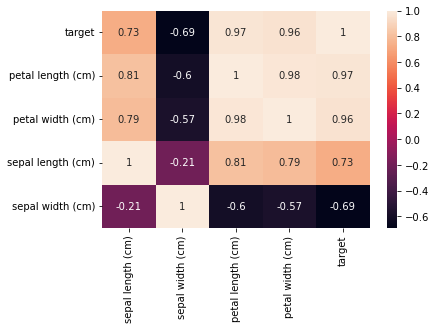

In [17]:
#graphical representation of the same
sns.heatmap(corr_matrix, annot=True)

In [18]:
#A:
"""from the above matrix it's clear that petal length column is the most correlated to the target"""

"from the above matrix it's clear that petal length column is the most correlated to the target"

In [19]:
# Create logistic regression object
LogReg = LogisticRegression()

In [20]:
#Train Logistic Regression

In [21]:
#Create (X,y) data pair ready for fitting the model
X = df[iris.feature_names]
y=df['target']

In [27]:

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model on the training set
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Print the confusion matrix and classification report
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification report:")
print(classification_report(y_test, y_pred))

NameError: name 'train_test_split' is not defined